In [8]:
import pandas as pd 
import numpy as np

from sklearn.preprocessing import Normalizer

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def plot_corr(corr,size=10):
    '''Plot a graphical correlation matrix for a dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Compute the correlation matrix for the received dataframe
    #corr = df.corr()
    
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='RdYlGn')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax,  aspect=40, shrink=.8)

In [3]:
df  = pd.read_csv('symbols-correlation.csv', index_col = 'Symbol')
df.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Symbol,,,,,,,,,,,,,,,,,,,,,
A,0,50,24,88,72,48,52,88,100,76,...,62,74,46,68,70,24,70,76,60,78
AAL,50,0,42,60,56,26,18,36,40,48,...,56,76,2,76,60,-6,38,32,74,38
AAP,24,42,0,46,62,12,16,20,36,22,...,36,48,28,70,60,8,24,22,48,22
AAPL,88,60,46,0,48,8,40,68,82,54,...,74,80,14,78,68,34,60,72,50,58
ABBV,72,56,62,48,0,50,84,78,94,54,...,26,58,48,62,56,16,58,44,68,56


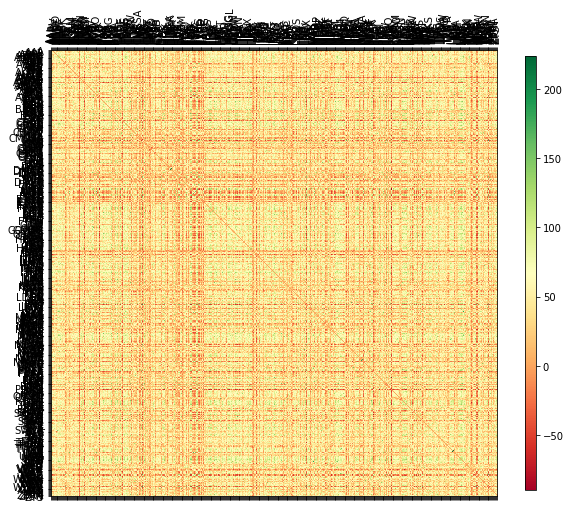

In [4]:
plot_corr(df, size=10)

In [20]:

import scipy.cluster.hierarchy as sch

def _clustering_pass(sub, is_corr):
    df = sub.copy()
    
    if is_corr: 
        X = df.values
    else:
        X = df.corr().values
    d = sch.distance.pdist(X)
    L = sch.linkage(d, method='complete')
    ind = sch.fcluster(L, 0.5*d.max(), 'distance')

    columns = [df.columns.tolist()[i] for i in list(np.argsort(ind))]
    df = df.reindex(columns, axis='columns')
    if is_corr: df = df.reindex(columns, axis='index')
    
    unique, counts = np.unique(ind, return_counts=True)
    counts = dict(zip(unique, counts))

    return (ind, counts, df)



In [45]:

import scipy.cluster.hierarchy as sch

def _clustering_pass(sub, is_corr , max_cluster = 10):
    df = sub.copy()
    
    if is_corr: 
        X = df.values
    else:
        X = df.corr().values
    d = sch.distance.pdist(X)
    L = sch.ward(d)
    ind = sch.fcluster(L, t = max_cluster, criterion ='maxclust')

    columns = [df.columns.tolist()[i] for i in list(np.argsort(ind))]
    df = df.reindex(columns, axis='columns')
    if is_corr: df = df.reindex(columns, axis='index')
    
    unique, counts = np.unique(ind, return_counts=True)
    counts = dict(zip(unique, counts))

    return (ind, counts, df)


In [46]:
index, counts ,df_1pass = _clustering_pass(df, is_corr=True , max_cluster = 5)
counts

{1: 7, 2: 1, 3: 20, 4: 9, 5: 13}

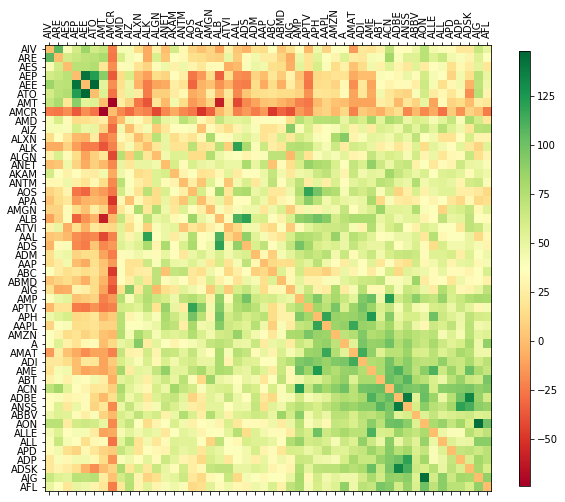

In [47]:
plot_corr(df_1pass, size=10)

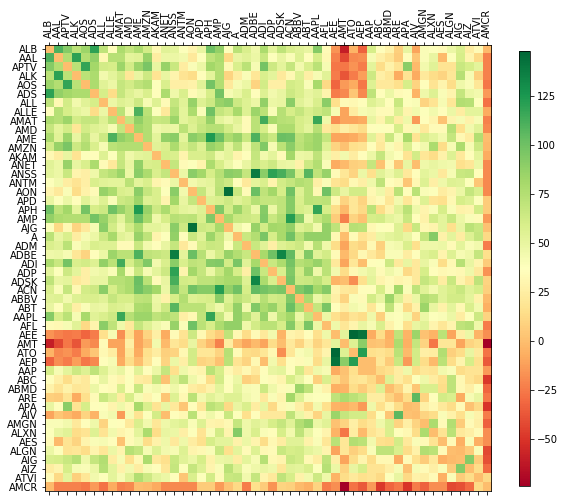

In [44]:
plot_corr(df_1pass, size=10)

In [36]:
df_1pass.head()

,NWSA,TGT,TAP,T,BA,BIIB,ROST,CAH,CMCSA,NWS,...,CERN,REGN,DGX,DPZ,VNO,BXP,DRI,VRTX,MO,SPG
Symbol,,,,,,,,,,,,,,,,,,,,,
NWSA,0,32,50,56,38,34,34,18,80,182,...,32,26,14,-4,54,48,10,24,18,46
TGT,32,0,42,28,24,14,50,8,38,32,...,4,24,28,8,6,-10,4,14,48,4
TAP,50,42,0,50,4,46,30,42,50,40,...,38,40,48,36,64,54,26,32,10,52
T,56,28,50,0,6,22,30,42,68,42,...,36,14,24,6,34,56,12,12,28,42
BA,38,24,4,6,0,54,70,22,58,34,...,12,42,2,12,24,28,46,12,2,10
